## load libraries


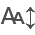

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import polars as pl
import pyarrow
from itables import init_notebook_mode
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
init_notebook_mode(all_interactive=True)

## load data

In [3]:
adata = sc.read_h5ad("../data/An_Integrated_Cell_Atlas_of_the_Human_Lung.h5ad")


In [20]:
# Summary of the AnnData object
print(adata)

AnnData object with n_obs × n_vars = 584944 × 27957
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

## data exploration

In [7]:
adata.obs["total_counts"] = adata.raw.X.sum(axis=1).A1

/tmp/ipykernel_923463/2390605799.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


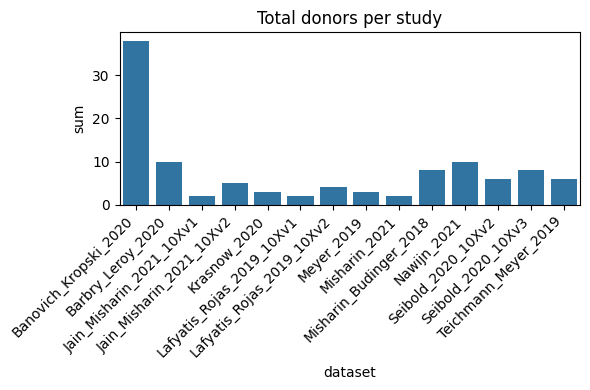

In [17]:
df_donors_per_study = (
    pl.from_pandas(adata.obs[["total_counts","dataset","donor_id"]], include_index=True)
        .unique(subset=["donor_id"])
        .group_by(pl.col("dataset"))
        .agg(sum=pl.len())
)
df_donors_per_study
def plot_total_donors_per_study(ax, df):
    sns.barplot(data=df, x="dataset", y="sum", ax=ax)
    ax.set_title("Total donors per study")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

fig, ax = plt.subplots(figsize=(6, 4)) 
plot_total_donors_per_study(ax, df_donors_per_study)  
plt.tight_layout()  
plt.show()  


/tmp/ipykernel_923463/751398465.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


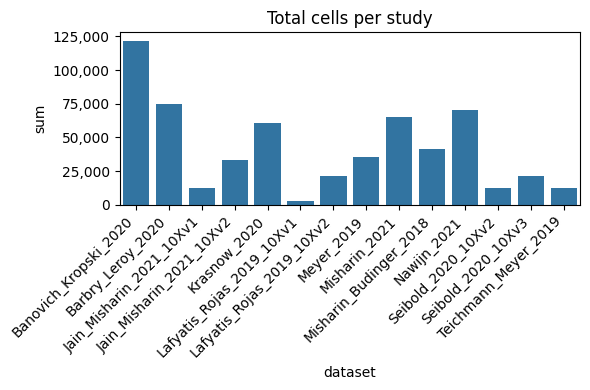

In [ ]:
df_cells_per_study = (
    pl.from_pandas(adata.obs[["total_counts","dataset","donor_id"]], include_index=True)
        .group_by(pl.col("dataset"))
        .agg(sum=pl.len())
)
df_cells_per_study

#sns.histplot(data=counts_per_study, x="donor_sum", bins=30, kde=True)
def plot_total_cells_per_study(ax, df):
    sns.barplot(data=df, x="dataset", y="sum", ax=ax)
    ax.set_title("Total cells per study")
    ax.figure.canvas.draw()  
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

fig, ax = plt.subplots(figsize=(6, 4))
plot_total_cells_per_study(ax, df_cells_per_study)
plt.tight_layout()
plt.show()


/tmp/ipykernel_923463/1604732351.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


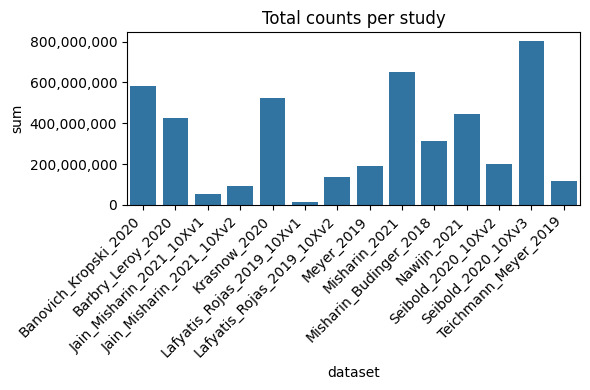

In [13]:
df_counts_per_study = (
    pl.from_pandas(adata.obs[["total_counts","dataset","donor_id"]], include_index=True)
        .group_by(pl.col("dataset"))
        .agg(sum=pl.col("total_counts").sum())
)
df_counts_per_study

#sns.histplot(data=counts_per_study, x="donor_sum", bins=30, kde=True)
def plot_total_counts_per_study(ax, df):
    sns.barplot(data=df, x="dataset", y="sum", ax=ax)
    ax.set_title("Total counts per study")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

fig, ax = plt.subplots(figsize=(6, 4))
plot_total_counts_per_study(ax, df_counts_per_study)
plt.tight_layout()
plt.show()


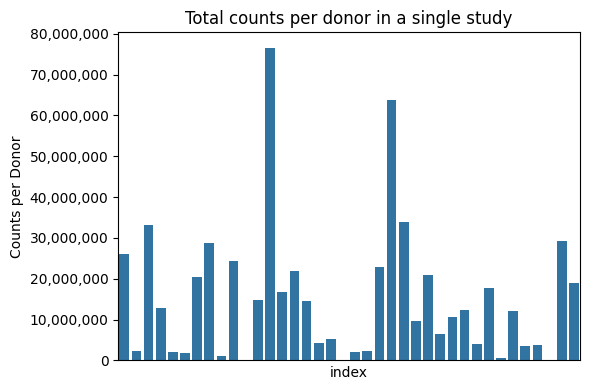

In [14]:
df_counts_per_donor = (
    pl.from_pandas(adata.obs[["total_counts","study","donor_id"]], include_index=True)
        .filter(pl.col("study")=="Banovich_Kropski_2020")
        .group_by(pl.col("donor_id"))
        .agg(donor_sum=pl.col("total_counts").sum())
        .with_columns((pl.arange(1, pl.len()+1).alias("index")))

)
df_counts_per_donor

#sns.histplot(data=counts_per_study, x="donor_sum", bins=30, kde=True)
##plt.xticks(rotation=90, ha="right")  
def plot_counts_per_donor(ax, df):
    sns.barplot(data=df, x="index", y="donor_sum", ax=ax)
    ax.set_title("Total counts per donor in a single study")
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_xticks([])
    ax.set_ylabel("Counts per Donor")

fig, ax = plt.subplots(figsize=(6, 4))
plot_counts_per_donor(ax, df_counts_per_donor)
plt.tight_layout()
plt.show()


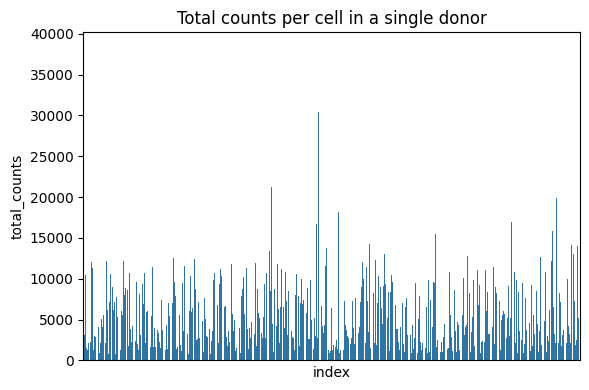

In [15]:
df_counts_per_cell = (
    pl.from_pandas(adata.obs[["total_counts","study","donor_id"]], include_index=True)
            .filter(pl.col("study")=="Banovich_Kropski_2020")
            .filter(pl.col("donor_id")=="homosapiens_None_2023_None_sikkemalisa_001_d10_1101_2022_03_10_483747THD0014")
            .with_columns((pl.arange(1, pl.len()+1)).alias("index"))
            
)
df_counts_per_cell

#sns.histplot(data=counts_per_study, x="total_counts", bins=30, kde=True)
#sns.violinplot(data=counts_per_study, y="total_counts")
def plot_counts_per_cell(ax, df):
    sns.barplot(data=df, x="index", y="total_counts", ax=ax)
    ax.set_title("Total counts per cell in a single donor")
    ax.set_xticks([])

fig, ax = plt.subplots(figsize=(6, 4))
plot_counts_per_cell(ax, df_counts_per_cell)
plt.tight_layout()
plt.show()


/tmp/ipykernel_923463/2390605799.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_923463/751398465.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_923463/1604732351.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


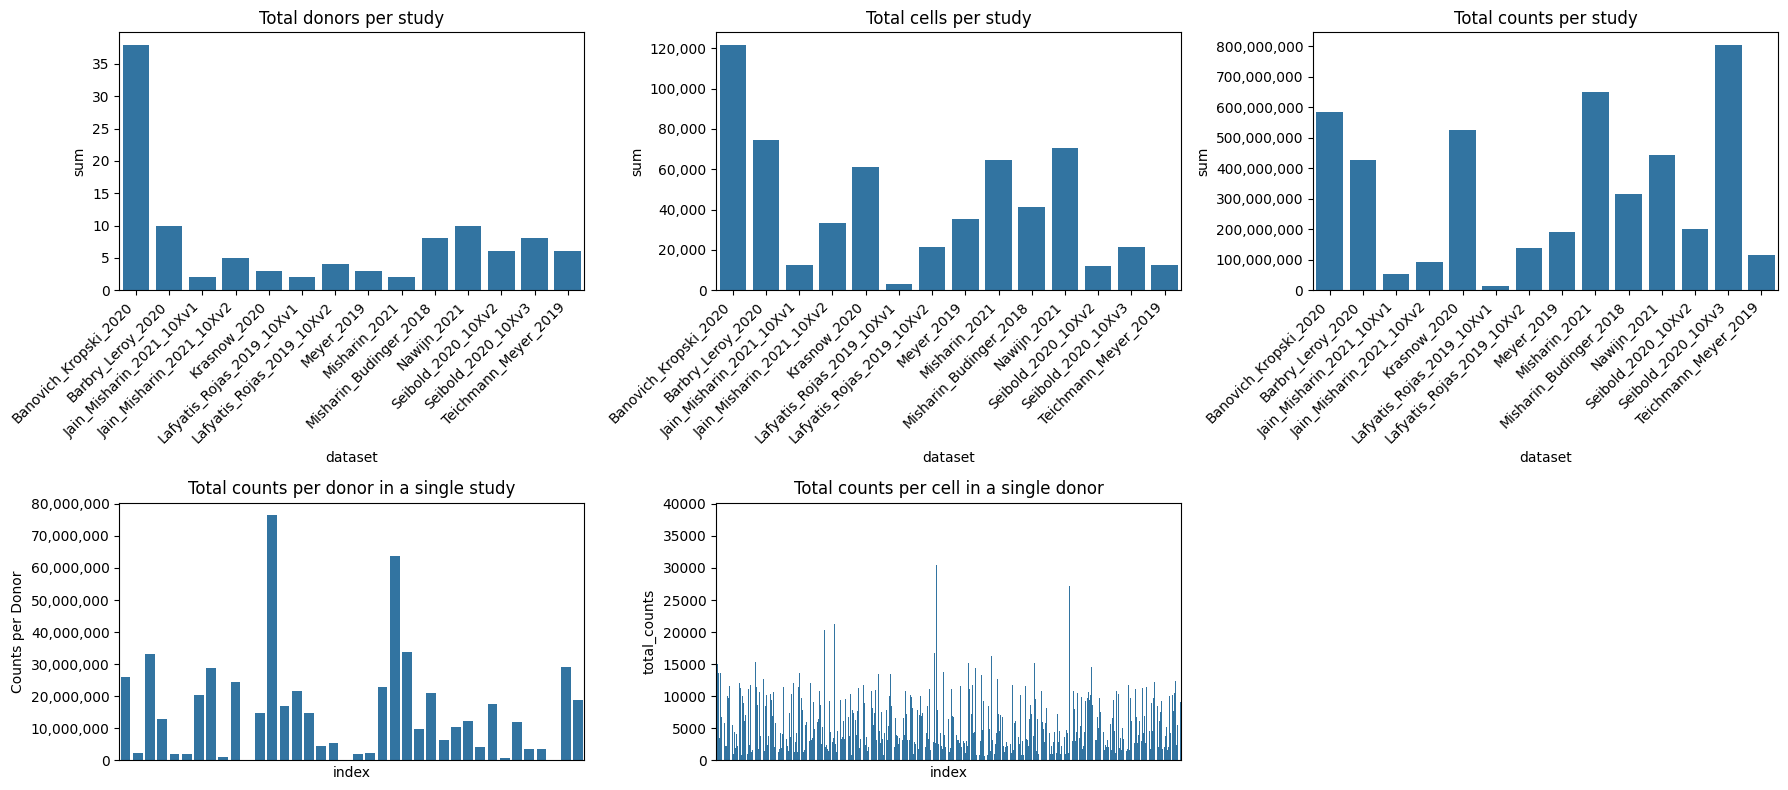

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

plot_total_donors_per_study(axes[0], df_donors_per_study)
plot_total_cells_per_study(axes[1], df_cells_per_study)
plot_total_counts_per_study(axes[2], df_counts_per_study)
plot_counts_per_donor(axes[3], df_counts_per_donor)
plot_counts_per_cell(axes[4], df_counts_per_cell)

fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig("../figures/datasets_statistics.png", dpi=300, bbox_inches='tight')
plt.show()

In [19]:
df = (
    pl.from_pandas(adata.obs[["ann_level_3"]], include_index=True)
        .unique(subset=["ann_level_3"])
)
df

shape: (25, 2)
┌─────────────────────────────────┬──────────────────────────────┐
│ None                            ┆ ann_level_3                  │
│ ---                             ┆ ---                          │
│ str                             ┆ cat                          │
╞═════════════════════════════════╪══════════════════════════════╡
│ CTTGATTGTCAGTTTG_T164           ┆ Basal                        │
│ GCCAAATCAAAGGCGT-SC56           ┆ EC capillary                 │
│ P2_1_GCGCAACCAGTTAACC           ┆ Innate lymphoid cell NK      │
│ GACCAATGTGCTCTTC-SC156          ┆ AT1                          │
│ AACGTTGGTTACCAGT_F02617         ┆ Lymphatic EC proliferating   │
│ …                               ┆ …                            │
│ GAATGAATCCTGCCAT-1-HCATisStab7… ┆ Lymphatic EC mature          │
│ D363_Biop_Pro1_GTTCGGGGTAGCCTA… ┆ Myofibroblasts               │
│ CCTCAGTTCGCCAGCA-1-HCATisStab7… ┆ Mast cells                   │
│ TTTATGCAGTGTTAGA-1-HCATisStab7… ┆ SM activated stress response │
│ D354_Biop_Pro1_ACGGCCACACAGCCC… ┆ Submucosal Secretory         │
└─────────────────────────────────┴──────────────────────────────┘